## This Is March
by Chancellor Tang

For this project, my goal was to see if it were possible to create a model that could predict the mens NCAA March Madness tournament. To do this, I retrieved 2 datasets. ncaam.csv, which has statistics for teams from tournament paticipants from the past five tournaments (2015-2019) With a column labeled "POSTSEASON", which stated how far each team went in the tournament. cbb21.csv hold team statistics from the 2021 season.

Link: https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ncaam = pd.read_csv('ncaam.csv')

In [4]:
ncaam21 = pd.read_csv('cbb21.csv')

**Data Cleansing**

The first step I took to cleanse was to drop all the schools not in the tournament out of the 2021 DataFrame. To do this, I created a condition to filter out any team with less than a 17 seed because 17 seeds do not exist in this tournament (yet). To make it easier for a later process, I also rearranged the columns so that the numeric values were grouped together. From there, for each DataFrame. I filled all null values with 0 and changed the seed number to an int. After restructuring the data, I divided the past tournaments DataFrame into their respective years.

In [5]:
ncaam21 = ncaam21[ncaam21['SEED'] < 17] 

In [6]:
new_columns = ['TEAM',
 'CONF',
 'POSTSEASON',
 'G',
 'W',
 'ADJOE',
 'ADJDE',
 'BARTHAG',
 'EFG_O',
 'EFG_D',
 'TOR',
 'TORD',
 'ORB',
 'DRB',
 'FTR',
 'FTRD',
 '2P_O',
 '2P_D',
 '3P_O',
 '3P_D',
 'ADJ_T',
 'WAB',
 'SEED',
 'YEAR']

In [7]:
ncaam = ncaam.fillna(0)
ncaam.SEED = ncaam.SEED.astype(int) 
ncaam = ncaam.reindex(columns=new_columns)

In [8]:
ncaam21 = ncaam21.fillna(0)
ncaam21.SEED = ncaam21.SEED.astype(int) 
ncaam21 = ncaam21.reindex(columns=new_columns)
ncaam21['YEAR']=2021

In [9]:
ncaam.head()

,TEAM,CONF,POSTSEASON,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
0,North Carolina,ACC,2ND,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1,2016
1,Wisconsin,B10,2ND,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1,2015
2,Michigan,B10,2ND,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3,2018
3,Texas Tech,B12,2ND,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3,2019
4,Gonzaga,WCC,2ND,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1,2017


In [10]:
ncaam19 = ncaam[ncaam['YEAR']==2019]
ncaam18 = ncaam[ncaam['YEAR']==2018]
ncaam17 = ncaam[ncaam['YEAR']==2017]
ncaam16 = ncaam[ncaam['YEAR']==2016]
ncaam15 = ncaam[ncaam['YEAR']==2015]

In [11]:
ncaam19.head()

,TEAM,CONF,POSTSEASON,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
3,Texas Tech,B12,2ND,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3,2019
6,Virginia,ACC,Champions,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1,2019
16,Duke,ACC,E8,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,1,2019
17,Purdue,B10,E8,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,18.6,34.5,27.0,29.9,31.7,51.5,47.2,37.4,34.2,67.0,6.1,3,2019
27,Kentucky,SEC,E8,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,17.9,36.8,25.5,41.9,26.8,52.9,43.6,35.4,34.3,66.9,8.8,2,2019


**Manual Input**


One of the drawbacks from this dataframe is that it does not tell you which leg of the bracket each team came from. This causes an issue with setting up matchups. To regroup the data, I had to manually create lists for each leg (4) of each tournament (6).

In [12]:
east19 =  [
    "Duke", 'Michigan St.', 'LSU', 'Virginia Tech',
    "Mississippi St.", "Maryland", 'Louisville', 'VCU',
    'UCF', 'Minnesota', 'Belmont', 'Liberty',
    'Saint Louis', 'Yale', 'Bradley', 'North Dakota St.'
]

In [13]:
west19 = [
    "Gonzaga", "Michigan", "Texas Tech", "Florida St.",
    "Marquette", "Buffalo", "Nevada", "Syracuse",
    "Baylor", "Florida", "Arizona St.", "Murray St.",
    "Vermont", "Northern Kentucky", "Montana", "Fairleigh Dickinson"
]

In [14]:
south19 = [
    "Virginia", "Tennessee", "Purdue", "Kansas St.",
    "Wisconsin", "Villanova", "Cincinnati", "Mississippi",
    "Oklahoma", "Iowa", "Saint Mary's", "Oregon",   
    "UC Irvine", "Old Dominion", "Colgate", "Gardner Webb"
]

In [15]:
midwest19 = [
    "North Carolina", "Kentucky", "Houston", "Kansas",
    "Auburn", "Iowa St.", "Wofford", "Utah St.",
    "Washington", "Seton Hall", "Ohio St.", "New Mexico St.",
    "Northeastern", "Georgia St.", "Abilene Christian", "Iona"
]

In [16]:
east18 = [
    "Villanova", "Purdue", "Texas Tech", "Wichita St.",
    "West Virginia", "Florida", "Arkansas", "Virginia Tech",
    "Alabama", "Butler", "St. Bonaventure", "Murray St.",
    "Marshall", "Stephen F. Austin", "Cal St. Fullerton", "Radford"
]

In [17]:
west18 = [
    "Xavier", "North Carolina", "Michigan", "Gonzaga",
    "Ohio St.", "Houston", "Texas A&M", "Missouri",
    "Florida St.", 'Providence', "San Diego St.", "South Dakota St.",
    "UNC Greensboro", "Montana", "Lipscomb", "Texas Southern"
]

In [18]:
south18 = [
    "Virginia", "Cincinnati", "Tennessee", "Arizona",
    "Kentucky", "Miami FL", "Nevada", "Creighton",
    "Kansas St.", "Texas", "Loyola Chicago", "Davidson",
    "Buffalo", "Wright St.", "Georgia St.", "UMBC"
]

In [19]:
midwest18 = [
    "Kansas", "Duke", "Michigan St.", "Auburn",
    "Clemson", "TCU", "Rhode Island", "Seton Hall",
    "North Carolina St.", "Oklahoma", "Syracuse", "New Mexico St.",
    "College of Charleston", "Bucknell", "Iona", "Penn"
]

In [20]:
east17 = [
    "Villanova", "Duke", "Baylor", "Florida",
    "Virginia", "SMU", "South Carolina", "Wisconsin",
    "Virginia Tech", "Marquette", "USC", "UNC Wilmington",
    "East Tennessee St.", "New Mexico St.", "Troy", "Mount St. Mary's"
]

In [21]:
west17 = [
    "Gonzaga", "Arizona", "Florida St.", "West Virginia",
    "Notre Dame", "Maryland", "Saint Mary's", "Northwestern",
    "Vanderbilt", "VCU", "Xavier", "Princeton",
    "Bucknell", "Florida Gulf Coast", "North Dakota", "South Dakota St."
]

In [22]:
south17 = [
    "North Carolina", "Kentucky", "UCLA", "Butler",
    "Minnesota", "Cincinnati", "Dayton", "Arkansas", 
    "Seton Hall", "Wichita St.", "Kansas St.", "Middle Tennessee",
    "Winthrop", "Kent St.", "Northern Kentucky", "Texas Southern"
]

In [23]:
midwest17 = [
    "Kansas", "Louisville", "Oregon", "Purdue",
    "Iowa St.", "Creighton", "Michigan", "Miami FL",
    "Michigan St.", "Oklahoma St.", "Rhode Island", "Nevada",
    "Vermont", 'Iona', "Jacksonville St.", "UC Davis"
]

In [24]:
east16 = [
    "North Carolina", "Xavier", "West Virginia", "Kentucky",
    "Indiana", "Notre Dame", "Wisconsin", "USC",
    "Providence", "Pittsburgh", "Michigan", "Chattanooga",
    "Stony Brook", "Stephen F. Austin", "Weber St.", "Florida Gulf Coast"
]

In [25]:
west16 = [
    "Oregon", "Oklahoma", "Texas A&M", "Duke",
    "Baylor", "Texas", "Oregon St.", "Saint Joseph's",
    "Cincinnati", "VCU", "Northern Iowa", "Yale",
    "UNC Wilmington", "Green Bay", "Cal St. Bakersfield", "Holy Cross"
]

In [26]:
south16 = [
    "Kansas", "Villanova", "Miami FL", "California",
    "Maryland", "Arizona", "Iowa", "Colorado",
    "Connecticut", "Temple", "Wichita St.", "South Dakota St.",
    "Hawaii", "Buffalo", "UNC Asheville", "Austin Peay"
]

In [27]:
midwest16 = [
    "Virginia", "Michigan St.", "Utah", "Iowa St.",
    "Purdue", "Seton Hall", "Dayton", "Texas Tech",
    "Butler", "Syracuse", "Gonzaga", "Arkansas Little Rock",
    "Iona", "Fresno St.", "Middle Tennessee", "Hampton"
]

In [28]:
east15 = [
    "Villanova", "Virginia", "Oklahoma", "Louisville",
    "Northern Iowa", "Providence", "Michigan St.", "North Carolina St.",
    "LSU", "Georgia", "Dayton", 'Wyoming',
    "UC Irvine", "Albany", "Belmont", "Lafayette"
]

In [29]:
west15 = [
    "Wisconsin", "Arizona", "Baylor", "North Carolina",
    "Arkansas", "Xavier", "VCU", "Oregon",
    "Oklahoma St.", "Ohio St.", "Mississippi", "Wofford",
    "Harvard", "Georgia St.", "Texas Southern", "Coastal Carolina"
]

In [30]:
south15 = [
    "Duke", "Gonzaga", "Iowa St.", "Georgetown",
    "Utah", "SMU", "Iowa", "San Diego St.", 
    "St. John's", "Davidson", "UCLA", "Stephen F. Austin", 
    "Eastern Washington", "UAB", "North Dakota St.", "Robert Morris"
]

In [31]:
midwest15 = [
    "Kentucky", "Kansas", "Notre Dame", "Maryland",
    "West Virginia", "Butler", "Wichita St.", "Cincinnati",
    "Purdue", "Indiana", "Texas", "Buffalo",
    "Valparaiso", "Northeastern", "New Mexico St.", "Hampton"
]

In [32]:
east21 = [
    "Michigan", "Alabama", "Texas", "Florida St.",
    "Colorado", "BYU", "Connecticut", "LSU",
    "St. Bonaventure", "Maryland", "UCLA", "Georgetown",
    "UNC Greensboro", "Abilene Christian", "Iona", "Texas Southern"
]

In [33]:
south21 = [
    "Baylor", "Ohio St.", "Arkansas", "Purdue",
    'Villanova', 'Texas Tech', "Florida", 'North Carolina',
    'Wisconsin', "Virginia Tech", "Utah St.", "Winthrop",
    "North Texas", "Colgate", "Oral Roberts", "Hartford"
]

In [34]:
midwest21 = [
    "Illinois", "Houston", "West Virginia", "Oklahoma St.",
    "Tennessee", "San Diego St.", "Clemson", "Loyola Chicago",
    "Georgia Tech", "Rutgers", "Syracuse", "Oregon St.",
    "Liberty", 'Morehead St.', 'Cleveland St.', 'Drexel'
]

In [35]:
west21 = [
    "Gonzaga", "Iowa", "Kansas", "Virginia",
    "Creighton", "USC", "Oregon", "Oklahoma",
    "Missouri", "VCU", "Drake", "UC Santa Barbara",
    "Ohio", "Eastern Washington", "Grand Canyon", "Norfolk St."
]

**Creating the Dataframes**

For creating each leg's dataframe, I created three functions. f(x) works like a case function. It looks up the value of the column "POSTSEASON" and returns a list of ones and zeros to act as dummy variables. The dummy(z) function user f(x) to create a dataframe of of all these dummy variables. Finally, create_df(x,y) creates a final dataframe where it merges (the region list with their year's respective nccam dataframe to import the data. This also uses the dummy(z) function to add on the dummy variables.

To create the dataframe, I used a for loop that creates the dataframes based on their region and their name.

In [36]:
def f(x):
    if x['POSTSEASON'] == "R64" : return [1,0,0,0,0,0,0]
    elif x['POSTSEASON'] == "R32" : return [1,1,0,0,0,0,0]
    elif x['POSTSEASON'] == "S16" : return [1,1,1,0,0,0,0]
    elif x['POSTSEASON'] == 'E8': return [1,1,1,1,0,0,0]
    elif x['POSTSEASON'] == 'F4': return [1,1,1,1,1,0,0]
    elif x['POSTSEASON'] == '2ND' or x['POSTSEASON'] == 'C2': return [1,1,1,1,1,1,0]
    elif x['POSTSEASON'] == 'Champions': return [1,1,1,1,1,1,1]
    else: return [0,0,0,0,0,0]

In [37]:
def dummy(z):
    a = []
    for x in range(0,len(z)):
        a.append(f(z.iloc[x]))
    a = pd.DataFrame(a)
    a = a.rename(columns={0: "R64", 1: "R32", 2: "S16",3: "E8", 4:"F4",5:"C2",6:"Champions"})
    return a

In [38]:
def create_df(x,y):
    v = pd.DataFrame(x)
    v = v.rename(columns={0: "TEAM"})
    v = v.merge(y, on = 'TEAM', how='left')
    v = v.join(dummy(v))
    return v

In [39]:
years = [15,16,17,18,19,21]
legs = ["east",'south', 'midwest', 'west']
for x in years:
    for y in range(0, len(legs)):
        globals()[legs[y] + '%s' % x + '%s' %"_df"] = create_df(globals()[legs[y] + '%s' % x],  globals()['ncaam' + '%s' % x])


**Determining an outcome**

The main issue regarding the matchups was how to create a dataframe that can be trained to predict the outcome to a game. While prediciting likeliness of what round each team would reach is easier, this would not give us the same head-to-head chaos that March Madness embodies. The best way to predict the outcome of each induvidual game is to create a dataframe that shows head-to-head matchups. 

To do this, I created a function diff(df,u) that takes a region dataframe (df) and creates the head-to-head matchups. This function repeats for the number of matchups in the region for that round (u). The function take the first team in the dataframe and the last team in the dataframe, which are the 1 and 16 seed, and works their way in. So in the next matchup, it would be the 2 seed agains the second to last seed (15), and the for loop would keep going until the last matchup (8 vs 9) is created by moving its way from the outside in. For each match set by the for loop, both are run through the lists(x,y), which subtracts the numeric statistics of y (the lower seed) by x (the higher seed) to create a difference. This difference is returned as  list of differences which is then appended to a its own list (listDF) in the diff(df,u) function. Once all the matchup differences are created, the function creates a dataframe using listDF and returns that dataframe. The predictive model will us this format of dataframe (the differences) as its training data.

In [40]:
df_headers = list(ncaam.columns)

In [41]:
def lists(a,b):
    listA = []
    for x in range(3,23):
        diff = a[x] - b[x]
        listA.append(diff)
    return listA

In [42]:
def diff(df,u):
    listDF = []
    for y in range(0,u):
        test_upsetH = df.iloc[y]
        test_upsetL = df.iloc[-(y+1)]
        listDF.append(lists(test_upsetH,test_upsetL))
    return pd.DataFrame(listDF, columns = df_headers[3:23])

**Creating a training dataset**

For creating a training dataset, I had to create a train function (train(a)) which takes a a list of all the region data frames (df_past), which is created in a for loop in cell 44. For that list, I chose to exclude 18 because it was influencing the data in a strange way, which is something I may look into later. Regardless, the train(a) function takes each dataframe in the list and generates the matchup.

For each round, the train function uses a placeholder variable (p) to store all the remaining teams as the rounds progress, so at the beginning of each round, p is set as a different value based on the round. For a majority of it, p is based on the asd dataframe or a section of that dataframe.

For the outcomes, we created the upsets(x,y) function which uses the number of the for loop (y) in the train(a) function to deterime the column round (z) we should use in the dataframe(x). Once it does, it also sets t, which is a dummy variable that indicates the length of the list we want. Since we are using the dummy variables that were created using the f(x) function, z was used to determine the column the dummy variables were drawn from. With that, we created listB, which housed the value of that column as a list. Since this determines upsets, had to reverse the list to see if the lower seed won. Once the list was reversed, the code used t to trim the list to fit the number of possible matchups in said round.

Once the upset list was created, we took the list generated by this function and assigned it to a variable (get_list). Then, using a for loop, I create variables h and l that get a list of the two teams that matchup and matches that with the upset variable associated with the matchup. The winning team is appended to a dataframe (asd) and the outcome from get_list is appended to a list (y_asd). We used the diff function to append each matchup difference to the training dataframe (x_asd). After all the regions go, we create a new column in x_asd using y_asd to export both x and y values in one dataframe.

In [43]:
def upsets(x,y):
    if y ==  0: 
        z = "R32"
        t = 8
    elif y == 1: 
        z =  "S16"
        t = 4
    elif y == 2: 
        z =  "E8"
        t = 2
    elif y == 3:
        z =  'F4'
        t = 1
    if y == 4:
        z =  'C2'
        t = 0
    listB = list(x[z])
    listB.reverse()
    listB = listB[0:t]
    return listB

In [44]:
df_past = []
train_years = [15,16,17,19]
for x in range(0,len(legs)):
    for y in train_years:
        df_past.append(globals()[legs[x] + '%s' % y + '%s' %"_df"])

In [45]:
def train(a):
    x_asd = pd.DataFrame(columns = new_columns[3:23])
    y_asd = []
    for z in a:
        asd = pd.DataFrame(columns = new_columns)
        for y in range(0,4):
            if y ==0:
                p = z
            elif y == 1:
                p = asd
            elif y == 2:
                p = asd.iloc[-4:]
            elif y == 3:
                p = asd.iloc[-2:]
            elif y == 4:
                p = asd.iloc[-1:]
            num = int(len(p)/2)
            get_list= upsets(p,y)
            for x in range(0,num):
                h = p.iloc[x]
                l = p.iloc[(-x-1)]
                if get_list[x] == 1:
                    asd = asd.append(l)
                if get_list[x] == 0:
                    asd = asd.append(h)
            for x in get_list:
                y_asd.append(x)
            x_asd = x_asd.append(diff(p,num))
    x_asd["TRAIN"] = y_asd
    x_asd.TRAIN = x_asd.TRAIN.astype(int)
    return x_asd

**Creating a training dataset (cont.)**

Using the train function, we created x_train. I created a list (y_train) from the "TRAIN" column in x_train. After establishing y, I dropped "TRAIN" from x_train so the x and y values are seperate.

In [46]:
x_train = train(df_past)
y_train = list(x_train['TRAIN'])
x_train = x_train.drop(columns = 'TRAIN')

In [47]:
x_train

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,4,14,12.1,-23.4,0.5824,-0.5,-8.0,-0.8,4.8,4.8,-3.3,11.4,2.9,0.2,-6.2,-1.9,-7.5,-0.4,18.4,-15
1,2,9,3.4,-22.7,0.4151,-5.9,-9.0,-4.6,-0.6,5.4,-5.4,2.7,0.4,-6.7,-11.1,-2.5,-3.5,-9.2,14.7,-13
2,2,0,6.7,-13.7,0.3600,-0.6,-5.5,-1.2,-0.4,-1.1,5.4,-6.2,-2.0,0.3,-4.0,-1.5,-4.5,6.2,7.8,-11
3,4,8,4.3,-9.4,0.2088,-3.0,-0.7,-1.0,4.1,4.7,0.1,8.5,-2.0,0.6,0.9,-7.5,-3.3,1.7,10.4,-9
4,2,8,13.3,-5.2,0.3107,3.7,-1.4,-1.0,1.3,5.0,-0.1,-0.6,0.0,-1.1,0.0,7.2,-2.8,-0.7,6.9,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,-1,1.6,-10.1,0.0877,0.1,-4.3,1.7,2.5,-4.3,1.8,0.2,4.7,-2.9,-7.4,2.8,0.4,-7.4,1.5,-3
3,6,1,1.3,-7.7,0.1294,-4.3,0.7,1.7,0.9,0.8,-3.7,2.3,8.3,-5.3,-3.0,-1.7,4.6,-0.2,6.4,-8
0,0,4,11.7,-1.0,0.0598,8.5,-3.0,-4.0,-1.3,-1.3,-0.2,-0.5,-9.8,10.5,-1.9,3.1,-3.1,2.0,-0.6,-3
1,-1,-1,-0.6,0.4,-0.0031,-1.9,1.1,-3.8,-4.8,-2.7,-3.9,-5.4,-12.5,-1.0,2.4,-2.3,-0.6,-1.6,2.2,-1


**Creating Models**

To get a sense of which is best, I created three predictive models using different libraries: MLP Neural networks, Linear SVC, and Random Forests. As one can see, when ran against its own training set, SVC was the lowest with 89.6% while MLP had a 100% accuracy rating. Even though MLP had a higher accuracy rating, this may be caused by overfitting.

Initially, I tried to binarize the data, which should help the SVC and MLP run better. In reality, it made it run worse. It predicted solely off of the seed number for each team, which the most basic model can do. Also, the accuracy to the training model went down to 73%. Not normalizing the data actually helped the predictions from being overfitted. 

In [48]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [49]:
mlp = MLPClassifier(max_iter= 1000, alpha=1)
mlp.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(x_train, y_train)))

Accuracy on training set: 1.000


In [50]:
svc = SVC(random_state = 0, C = 1)
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(x_train, y_train)))

Accuracy on training set: 0.896


In [51]:
regressor = RandomForestClassifier(n_estimators=10, random_state = 0)
regressor.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    regressor.score(x_train, y_train)))

Accuracy on training set: 0.992


**Running the Predictions**

To do this, I create dataframes for each round of the tournament. From there, I created three appendable variables: test_df as an x_test, y_pred as a y_test, and matchup list to keep track of which teams faced off as a visual check. The for loop takes all four regions and sets it equal to the round64 variable. Using the rounds list, which had all the dataframes up until the final four, the for loop would take each round and simulate each matchup by using the lists function to create those differences that were used in the x_train dataframe. Using the result from the lists function (holder), I used the predict function for each ML library to take the values and see if the game was an upset or not. For each game, it would print the matchup, and once the prediction was made, it would print the winner and append the winner to the wins list. Using the wins list, a dataframe would be created (rounds[x+1]). After creating the datframe, it would append the prediction to y_pred and the matchup to matchup_list. After all the rounds how gone, each dataframe created for the round is appended with data from the rounds[x+1].

For each predictive model, it has to be input in the variable q because I have yet to create a loop that can run all these libraries concurrently. "q" is the type of model the prediction runs (SVC, MLP, regressor).

In [52]:
r64 = pd.DataFrame(columns = df_headers)
r32 = pd.DataFrame(columns = df_headers)
s16 = pd.DataFrame(columns = df_headers)
e8 = pd.DataFrame(columns = df_headers)
f4 = pd.DataFrame(columns = df_headers)
c2= pd.DataFrame(columns = df_headers)
winner= pd.DataFrame(columns = df_headers)

In [53]:
q = mlp

In [54]:
test_df = pd.DataFrame(columns = df_headers[3:23])
y_pred = []
matchup_list = []
print('\033[1m' + str(q) + '\033[0m' + "\n")
for x in [east21_df, south21_df, midwest21_df, west21_df]:
    r64 = r64.append(x)
    round64 = x
    rounds = [round64, r32, s16, e8, f4]
    for r in range (0,len(rounds)-1):
        wins = []
        y = len(rounds[r])/2
        y = int(y)
        for x in range(0, y):
            h = rounds[r].iloc[x]
            l = rounds[r].iloc[-x-1]
            holder = pd.DataFrame([lists(h,l)], columns = df_headers[3:23])
            ups = q.predict(holder)
            ups = list(ups)[0]
            print(h['SEED'], h['TEAM'], ' vs. ', l['SEED'], l['TEAM'])
            if ups == 0: 
                wins.append(h)
                print("Winner:", h['SEED'], h['TEAM'])
            if ups == 1:
                wins.append(l)
                print("Winner:", l['SEED'], l['TEAM'])
            test_df = test_df.append(holder)
            matchup = h['TEAM'] + ' vs. ' + l['TEAM']
            matchup_list.append(matchup)
            y_pred.append(ups)
        rounds[r+1] = pd.DataFrame(data = wins, columns = df_headers)
    print("_" * 40)

    r32 = r32.append(rounds[1])
    s16 = s16.append(rounds[2])
    e8 = e8.append(rounds[3])
    f4 = f4.append(rounds[4])

MLPClassifier(alpha=1, max_iter=1000)

1 Michigan  vs.  16 Texas Southern
Winner: 1 Michigan
2 Alabama  vs.  15 Iona
Winner: 2 Alabama
3 Texas  vs.  14 Abilene Christian
Winner: 3 Texas
4 Florida St.  vs.  13 UNC Greensboro
Winner: 13 UNC Greensboro
5 Colorado  vs.  12 Georgetown
Winner: 5 Colorado
6 BYU  vs.  11 UCLA
Winner: 11 UCLA
7 Connecticut  vs.  10 Maryland
Winner: 10 Maryland
8 LSU  vs.  9 St. Bonaventure
Winner: 8 LSU
1 Michigan  vs.  8 LSU
Winner: 8 LSU
2 Alabama  vs.  10 Maryland
Winner: 2 Alabama
3 Texas  vs.  11 UCLA
Winner: 11 UCLA
13 UNC Greensboro  vs.  5 Colorado
Winner: 5 Colorado
8 LSU  vs.  5 Colorado
Winner: 5 Colorado
2 Alabama  vs.  11 UCLA
Winner: 2 Alabama
5 Colorado  vs.  2 Alabama
Winner: 2 Alabama
________________________________________
1 Baylor  vs.  16 Hartford
Winner: 1 Baylor
2 Ohio St.  vs.  15 Oral Roberts
Winner: 2 Ohio St.
3 Arkansas  vs.  14 Colgate
Winner: 3 Arkansas
4 Purdue  vs.  13 North Texas
Winner: 4 Purdue
5 Villanova  vs.  12 Winthrop
Win

**The Final Four**

The final four dataframe (f4) works because I ordered the list from the previous for loop to create the correct matchup. Using the same method as above, I ran each matchup and determined the winner (winner_df).

In [55]:
f4.head()

,TEAM,CONF,POSTSEASON,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
1,Alabama,SEC,NaN,30,24,111.0,88.1,0.9343,51.3,45.3,18.6,21.1,31.5,29.8,28.6,31.9,50.1,46.4,35.1,28.8,73.9,6.8,2,2021
1,Ohio St.,B10,NaN,30,21,122.1,97.0,0.9340,53.1,48.9,15.3,15.0,29.1,27.4,37.6,33.8,52.1,47.4,36.5,34.1,66.9,6.0,2,2021
1,Houston,Amer,NaN,26,24,120.6,90.9,0.9626,51.3,42.9,16.3,21.6,39.4,28.0,30.7,42.4,49.9,43.0,35.5,28.5,65.0,4.0,2,2021
1,Iowa,B10,NaN,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,16.3,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2,2021


In [60]:
final_four = [f4, c2, winner]
for r in range (0,len(final_four)-1):
    wins = []
    y = len(final_four[r])/2
    y = int(y)
    for x in range(0, y):
        h = final_four[r].iloc[x]
        l = final_four[r].iloc[-x-1]
        holder = pd.DataFrame([lists(h,l)], columns = df_headers[3:23])
        ups = q.predict(holder)
        ups = list(ups)[0]
        matchup = h['SEED'] , h['TEAM'], ' vs. ', l['SEED'], l['TEAM']
        print(matchup)
        if ups == 0: 
            wins.append(h)
            print("Winner:", h['SEED'], h['TEAM'])
        if ups == 1:
            wins.append(l)
            print("Winner:", l['SEED'], l['TEAM'])
        test_df = test_df.append(holder)
        matchup_list.append(matchup)
        y_pred.append(ups)
    final_four[r+1] = pd.DataFrame(data = wins, columns = df_headers)
df_c2 = final_four[1]
df_winner = final_four[2]

   G  W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  TOR  TORD  ORB  DRB  FTR  FTRD  \
0  1  3  -12.5   -7.6  -0.0148   -3.3   -3.0  5.3   4.8  0.8  1.2 -3.4   9.3   

   2P_O  2P_D  3P_O  3P_D  ADJ_T  WAB  SEED  
0  -2.3   0.6  -3.5  -6.0    3.9  1.2     0  
(2, 'Alabama', ' vs. ', 2, 'Iowa')
Winner: 2 Iowa
   G  W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  TOR  TORD   ORB  DRB  FTR  FTRD  \
0  4 -3    1.5    6.1  -0.0286    1.8    6.0 -1.0  -6.6 -10.3 -0.6  6.9  -8.6   

   2P_O  2P_D  3P_O  3P_D  ADJ_T  WAB  SEED  
0   2.2   4.4   1.0   5.6    1.9  2.0     0  
(2, 'Ohio St.', ' vs. ', 2, 'Houston')
Winner: 2 Ohio St.
   G  W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  TOR  TORD  ORB  DRB  FTR  FTRD  \
0 -1  0    1.4   -1.3   0.0151    1.5   -0.6 -2.0   1.3  1.6  1.2 -5.6 -11.2   

   2P_O  2P_D  3P_O  3P_D  ADJ_T  WAB  SEED  
0   0.3  -1.6   2.1   0.7    3.1 -0.4     0  
(2, 'Iowa', ' vs. ', 2, 'Ohio St.')
Winner: 2 Ohio St.


In [57]:
test_df['UPSET'] = y_pred

In [58]:
test_df["MATCHUP"] = matchup_list

In [59]:
df_winner

,TEAM,CONF,POSTSEASON,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
1,Ohio St.,B10,NaN,30,21,122.1,97.0,0.934,53.1,48.9,15.3,15.0,29.1,27.4,37.6,33.8,52.1,47.4,36.5,34.1,66.9,6.0,2,2021


**The Results** *

Because the tournament is not set in stone yet, I chose to check my results by creating a bracket entry in the ESPN Tournament Challenge. The pts are awards to every correct pick, and more points are given to correct picks in later rounds (Round 1: 10 pts per correct prediction, Round 2: 20 points for each correct prediction). As one can see, the MLP neural network has the highest point total. However, the neural network chose Ohio State to win the entire bracket, who lost in the first round, which is why the maximum points they can get for the rest of the tournament is 730. As a comparison, I created a bracket of my own, which was a gung-ho prediction from my convoluted brain. While it has the lowest point total through two rounds, it has the highest possible point total, which shows that ML models do not predict well in the later rounds.

This flaw in predicting is caused by one of three things: the overfitting of the model, the fact that the training model only had up to the second-to-last round, or the skewness of the training set. I spoke about the first two, but not the last one. The problem with creating one training dataframe is that the first round (R64) has 32 games. The rest of the tournament has 31 games in total. The sheer number of games in the first round skews the training model, which could explain why these models had such poor outlooks for the tournament.

In the future, to combat this, I will have to create multiple training models for each round so the first round skew is eliminated. The issue with that is that the final round which is one game, has a total of one game, which could make the model highly inaccurate due to the lack of data.

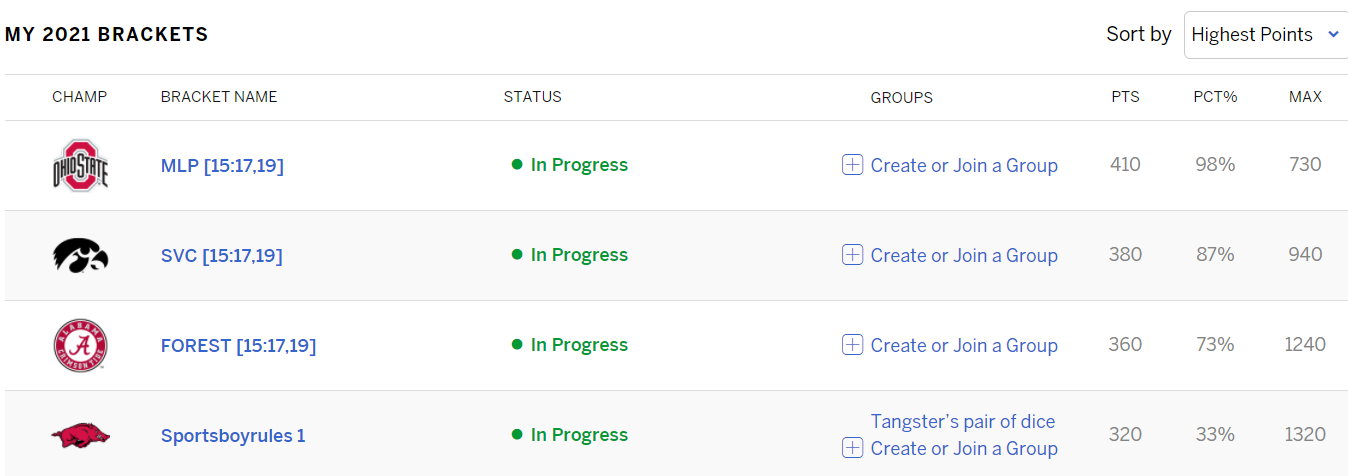

In [60]:
from IPython.display import Image
Image(filename='Bracket Results.png') 